Saturation curves for SM-omics and ST<br>

Input files are generated by counting number of unique molecules and number of annotated reads per annotated region after adjusting for sequencing depth, in downsampled fastq files (proportions 0.001, 0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1) processed using ST-pipeline.<br>


In [1]:
%matplotlib inline
import os
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import glob
import warnings
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
warnings.filterwarnings('ignore')

In [2]:
def condition(row):
    """ Takes row in pandas df as input and returns type of condition
    """
    # The samples are run in triplicate based on condition
    condition = ['sm-omics', 'ST']

    if row['Name'] in ['10015CN45_C2', '10015CN45_D2', '10015CN45_E2']:
        return condition[0]
        
    elif row['Name'] in ['10015CN45_C1', '10015CN45_D1', '10015CN45_E1']:
        return condition[1]

In [3]:
# Load input files
path = '../../smomics_data'

stats_list = []

samples_list = ['10015CN45_C1', '10015CN45_D1', '10015CN45_E1', '10015CN45_C2', '10015CN45_D2', '10015CN45_E2']

prop_list = [0.001, 0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1]

for filename in samples_list:
    
    cond_file = pd.read_csv(os.path.join(path, filename + '_genes_after_seq_depth_in_spots_under_outside_tissue.txt'), sep = '\t')
    print(cond_file)

    cond_file['Condition'] = cond_file.apply(lambda row: condition(row), axis = 1)
    
    cond_file.sort_values(by='Num reads', inplace=True)
    cond_file['Prop_annot_reads'] = prop_list
    
    cond_file['norm uniq gen inside'] = cond_file['Genes inside']
    cond_file['norm uniq gen outside'] = cond_file['Genes outside']

    stats_list.append(cond_file)

# Concat all files
cond_merge = pd.concat(stats_list)
    

           Name  Genes inside  Genes outside  Annot reads  Num reads
0  10015CN45_C1    841.872671     427.807299      1009444    3556812
1  10015CN45_C1      0.121875       0.217116         4481      15843
2  10015CN45_C1   1581.897516     827.105109      2020560    7115574
3  10015CN45_C1    371.776398     189.290511       505358    1777431
4  10015CN45_C1   2154.164596    1147.935766      3033669   10674337
5  10015CN45_C1    135.664596      69.271533       252395     887740
6  10015CN45_C1   2977.757764    1644.786861      5054571   17791861
7  10015CN45_C1   2604.559006    1413.046715      4044432   14233099
8  10015CN45_C1      7.108696       4.254386        49934     175988
           Name  Genes inside  Genes outside  Annot reads  Num reads
0  10015CN45_D1    203.237537     100.517293       329243    1312457
1  10015CN45_D1      0.169139       0.202073         3964      15849
2  10015CN45_D1     63.788856      32.729730       164653     657604
3  10015CN45_D1    508.038123     

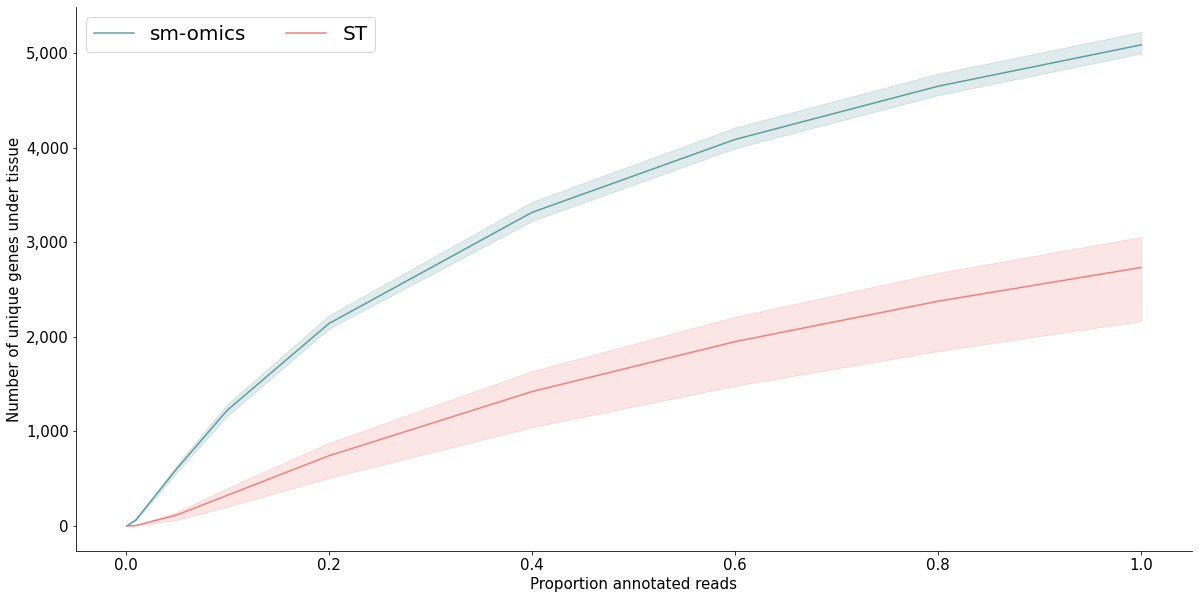

In [4]:
#Plot 
fig = plt.figure(figsize=(20, 10))
x="Prop_annot_reads"
y="norm uniq gen inside"
#y="Genes"
hue='Condition'

################ LINE PLOT

ax = sns.lineplot(x=x, y=y, data=cond_merge,hue=hue, 
                  palette =['cadetblue', 'lightcoral'], hue_order = ['sm-omics', 'ST'],ci=95)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('k')
ax.spines['left'].set_color('k')

# X and y label size
ax.set_xlabel("Proportion annotated reads", fontsize=15)
ax.set_ylabel("Number of unique genes under tissue", fontsize=15)

# Set ticks size
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)

# change background color
back_c = 'white'
ax.set_facecolor(back_c)
ax.grid(False)

# Thousand seprator on y axis
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# LEGEND
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=['sm-omics', 'ST'],loc='upper left', ncol=2, fontsize=20)


fig.set_size_inches(20, 10)
# plt.savefig("../../figures/saturation_sm_st_genes_inside.pdf", transparent=True, bbox_inches = 'tight',
#      pad_inches = 0, dpi=1200)
plt.show()

In [5]:
cond_merge['Prop_annot_reads'] = 100*cond_merge['Prop_annot_reads']

In [6]:
#cond_merge.to_csv('../../smomics_data/sm_st_unique_genes_under_outside_tissue_cancer.csv')

In [7]:
cond_merge

,Name,Genes inside,Genes outside,Annot reads,Num reads,Condition,Prop_annot_reads,norm uniq gen inside,norm uniq gen outside
1,10015CN45_C1,0.121875,0.217116,4481,15843,ST,0.1,0.121875,0.217116
8,10015CN45_C1,7.108696,4.254386,49934,175988,ST,1.0,7.108696,4.254386
5,10015CN45_C1,135.664596,69.271533,252395,887740,ST,5.0,135.664596,69.271533
3,10015CN45_C1,371.776398,189.290511,505358,1777431,ST,10.0,371.776398,189.290511
0,10015CN45_C1,841.872671,427.807299,1009444,3556812,ST,20.0,841.872671,427.807299
2,10015CN45_C1,1581.897516,827.105109,2020560,7115574,ST,40.0,1581.897516,827.105109
4,10015CN45_C1,2154.164596,1147.935766,3033669,10674337,ST,60.0,2154.164596,1147.935766
7,10015CN45_C1,2604.559006,1413.046715,4044432,14233099,ST,80.0,2604.559006,1413.046715
6,10015CN45_C1,2977.757764,1644.786861,5054571,17791861,ST,100.0,2977.757764,1644.786861
1,10015CN45_D1,0.169139,0.202073,3964,15849,ST,0.1,0.169139,0.202073
